# Multi-Tool Discord Bot

# To Do

- Correct headers into one format for all bots/ methods.
- Work on returning visuals from finance-bot.
- Update email methods, with more user input to config.
- Plugin discordWeaterBot
    - Work on getting users location with discordWeaterBot
    - Work on getting music player to run inside of Discord desktop app?
- Add additional methods/ functionalities of the bot.

### Cheack to see you are in the right `conda env`
You can run the necessary pip installs if you don't have the necessary dependencies yet.

In [1]:
!conda env list 

# conda environments:
#
base                  *  C:\ProgramData\Anaconda3
alpacaenv                C:\ProgramData\Anaconda3\envs\alpacaenv
discobotenv              C:\ProgramData\Anaconda3\envs\discobotenv
finquant                 C:\ProgramData\Anaconda3\envs\finquant
pyvizenv                 C:\ProgramData\Anaconda3\envs\pyvizenv



In [2]:
# !pip list 

## Imports

In [2]:
#!pip install python-dotenv

# Windows install
#!py -3 -m pip install -U discord.py
# Linux/macOS
#!python3 -m pip install -U discord.py

# !pip install logging
# !pip install yfinance
# !pip install bs4
# !pip install emails

# !pip install torch alpha_vantage

# !pip install tweepy

from dotenv import load_dotenv
import os
import logging
import imaplib, ssl, re, discord

import discord
from discord import FFmpegPCMAudio
from discord.ext import commands
import os
import requests
import json

import yfinance as yf

import imaplib, ssl, re, discord

import random
from discord.ext import commands

import tweepy

import pandas as pd

import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from fear_greed_index.CNNFearAndGreedIndex import CNNFearAndGreedIndex

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from alpha_vantage.timeseries import TimeSeries 

# import time

## Skeleton Code Block

In [ ]:
# below function invoked with "#info" in a Discord chat
@client.command(pass_context = True)
async def info(ctx):
    await ctx.channel.send("""
    
    ```
    #help -- this help screen
    #whelp -- Weather Bot functionality help
    #fhelp -- Finance Bot functionality help
    #ehelp -- Email Bot functionality help
    ```
    
    """)

Use the `load_dotenv()` method from the `dotenv` package to load and export the environment variables:

In [8]:
load_dotenv()

True

Use the `os.getenv` function to retrieve the environment variable named `API_KEY`. Store as a Python variable named `api_key`:

In [9]:
api_key = os.getenv("API_KEY")

In [10]:
email_user = os.getenv("EMAIL_USER")
email_pswrd = os.getenv("EMAIL_PSWRD")
WEATHER_KEY = os.getenv("WEATHER_KEY")
RAPIDAPI_KEY = os.getenv("RAPIDAPI_KEY")
# https://rapidapi.com/rpi4gx/api/fear-and-greed-index/
SYMBOL_KEY = os.getenv("SYMBOL_KEY")
# Claim your free API key here: https://www.alphavantage.co/support/#api-key
TW_API_KEY = os.getenv("TW_API_KEY") # twitter api key. 
# Get twitter API key: https://developer.twitter.com/en/docs/twitter-api
TW_API_KEY_SECRET = os.getenv('TW_API_KEY_SECRET')
TW_ACCESS_TOKEN = os.getenv('TW_ACCESS_TOKEN')
TW_ACCESS_TOKEN_SECRET = os.getenv('TW_ACCESS_TOKEN_SECRET')

Use the type function to confirm the retrieval of the API key.

In [11]:
# type(api_key)

Change Directories to Return Images

In [ ]:
os.chdir('Images')

### ResourceBot

In [ ]:
# credentials will be loaded via the environment variables;
# empty strings as placeholders for now
user = email_user
password = email_pswrd

hostname = "outlook.office365.com"

# creates a security context
context = ssl.create_default_context()
conn = imaplib.IMAP4_SSL(host=hostname, ssl_context=context)

conn.login(user, password)

# set readOnly flag to false to allow for deletion of processed emails 
conn.select("Inbox", readonly=False)


# find all emails from Quincy Larson; the second return 
# (the one stored in data) is the result list
typ, data = conn.search(None, "FROM", "quincy@freecodecamp.org")


# set up lists for later use
emails = []
link_results = []
links = []

# the way the datatype in the data variable is stored requires that
# the first item in the container be split to access emails
for email in data[0].split():
    
    # grab an email and store it in result
    typ, result = conn.fetch(email, '(RFC822)')

    # result[0][1] is the body of the email in byte form
    emails.append(result[0][1].decode())


    # move emails deleted folder so as not re-process them in the future
    conn.store(email, '+FLAGS', '\\Deleted')

# delete emails from deleted folder
conn.expunge()

# the connection to the email is no longer necessary
conn.close()
conn.logout()

# for some reason, the emails have a quirk where the body is separated by
# a sequence of characters, '=\r\n' instead of a typical newline
for i in range(len(emails)):

    # split by the character pattern and rejoin using an empty string for
    # easier parsing
    emails[i] = "".join(emails[i].split("=\r\n"))

    # use regular expressions to parse the email bodies and append results
    # to the list
    link_results.append(re.findall("(http.*)\s", emails[i]))

# the re.findall() method returns a list, so each item in link_results is
# a list, hence te second for loop
for item in link_results:

    # as of the time that I began receiving emails, Quincy Larson primarily
    # sends 5 links per email; the FIRST five are the relevant ones
    for i in range(5):
        links.append(item[i])

@client.command(pass_context = True)
async def ehelp(ctx):
    await ctx.channel.send("""

    Welcome to EmailBot
    this is a placeholder help screen
    
    """)

### Finance-Bot

In [ ]:
async def on_message(self, message):
        if message.author == client.user:
            return

        #Help command allowing user to view available commands
        if message.content.startswith('#fhelp'):
            await message.channel.send("Current commands: \n '$help' \n '$hello' \n " +
                                       "'$search' (Search for a stock) \n '$example' \n " +
                                       "'$pss' (popular stock symbols)")

        #Simple Greeting
        if message.content.startswith('#hello'):
            await message.channel.send("Hello! I'm Finance Bot! I'm currently under development.")

        #Shows the user a list of popular stocks (they are not required choices)
        if message.content.startswith('#pss'):
            await message.channel.send("Popular Stock Symbols:\nAMC inc: 'AMC'\nApple: 'AAPL'\nNVIDIA Corp: 'NVDA'\n" +
                                       "Moderna inc: 'MRNA'\nMicrosoft Corp: 'MSFT'\nTesla inc: 'TSLA'\nAmazon.com inc: 'AMZN'")

        #Shows the user an example output
        if message.content.startswith('#example'):
            stock = yf.Ticker("AAPL")

            name = stock.info['longName']
            symbol = stock.info['symbol']
            exchange = stock.info['exchange']
            currentPrice = stock.info['currentPrice']
            previousClose = stock.info['previousClose']
            dayOpen = stock.info['open']
            bid = stock.info['bid']
            ask = stock.info['ask']
            dayLow = stock.info['dayLow']
            dayHigh = stock.info['dayHigh']
            volume = stock.info['volume']
            await message.channel.send(name + '--'+'\n' + 'Symbol : '+symbol+'\n' +
                                       'Exchange : '+exchange+'\n' + 'CurrentPrice : '+str(currentPrice)+'\n' +
                                       'PreviousClose : '+str(previousClose)+'\n' + 'DayOpen : '+str(dayOpen)+'\n' +
                                       'Bid : '+str(bid)+'\n' + 'Ask : '+str(ask)+'\n' + 'DayLow : '+str(dayLow)+'\n' +
                                       'DayHigh : '+str(dayHigh)+'\n' + 'Volume : '+str(volume))

        #Main tool allowing users to search for any stock using its symbol
        if message.content.startswith('#search'):
            await message.channel.send("Please enter a stock symbol to search.")

            def check(msg):
                return msg.author.id == message.author.id
            msgInfo = await client.wait_for('message', check=check)
            stockSymbol = msgInfo.content

            stock = yf.Ticker(str(stockSymbol))

            name = stock.info['longName']
            symbol = stock.info['symbol']
            exchange = stock.info['exchange']
            currentPrice = stock.info['currentPrice']
            previousClose = stock.info['previousClose']
            dayOpen = stock.info['open']
            bid = stock.info['bid']
            ask = stock.info['ask']
            dayLow = stock.info['dayLow']
            dayHigh = stock.info['dayHigh']
            volume = stock.info['volume']

            try:
                await message.channel.send(name + '--'+'\n' + 'Symbol : '+symbol+'\n' +
                                           'Exchange : '+exchange+'\n' + 'CurrentPrice : '+str(currentPrice)+'\n' +
                                           'PreviousClose : '+str(previousClose)+'\n' + 'DayOpen : '+str(dayOpen)+'\n' +
                                           'Bid : '+str(bid)+'\n' + 'Ask : '+str(ask)+'\n' + 'DayLow : '+str(dayLow)+'\n' +
                                           'DayHigh : '+str(dayHigh)+'\n' + 'Volume : '+str(volume))
            except KeyError:
                logging.exception('Incorrect Stock Symbol')

### statsBot

In [ ]:
# Retrieve total amount of messages user has sent
# Throws an error: 'CategoryChannel' has no attribute 'history'

# stats = "" # statistics of multiple users
# counter =  0 # number of messages from specific user

# def msgstats(ctx, arg):
#     print('Entering msgstats configuration...')
#     if arg.lower() == 'all':
#         await ctx.send("Calculating message stats for all server users. May take several moments...")
#         users = ctx.guild.members # list of all users in server
#         counters = [0] * len(users) # list of message counters
#         for channel in ctx.guild.channels:
#             for msg in channel.history(limit=None):
#                 for u in users:
#                     if msg.author == u:
#                         counters[users.index(u)] += 1
#         for user in users:
#             stats += "User " + user + " has " + counters[user.index] + " messages in the server.\n"
#             counter += counters[user.index]
#         stats += "There are a total of " + counter + " messages in this server."
#         await ctx.send(stats)
#     else:
#         if ctx.guild.members.contains(arg):
#             for channel in ctx.guild.channels:
#                 for msg in channel.history(limit=None):
#                     if msg.author == arg:
#                         counter += 1
#         await ctx.send('User {arg} has sent {counter} messages in this server.'.format(arg, counter))

### discordWeatherBot

In [ ]:
# GETWEATHER FUNCTION
# pre: must own a accuweather API key to be used through a getAPIKey() function
# post: returns formated weather for printing
def getWeather(location):
    # Connect to API
    response = requests.get \
    ("http://dataservice.accuweather.com/locations/v1/cities/search?apikey=" \
     + WEATHER_KEY + "&q=" + location)
    # Load API response into disctionary
    location = json.loads(response.text)
    
    if not location:
        return "ERROR: Not a valid location!"
    else:
        locationNum = location[0]["Key"]
    
    response = requests.get \
    ("http://dataservice.accuweather.com/forecasts/v1/daily/1day/" + locationNum + "?apikey=" \
     + WEATHER_KEY + "&language=en-us")
    
    # Load API response into dictionary
    weather = json.loads(response.text)
    
    # Set needed values
    dailyMin = weather["DailyForecasts"][0]["Temperature"]["Minimum"]["Value"]
    dailyMax = weather["DailyForecasts"][0]["Temperature"]["Maximum"]["Value"]
    dayWeather = weather["DailyForecasts"][0]["Day"]["IconPhrase"]
    nightWeather = weather["DailyForecasts"][0]["Night"]["IconPhrase"]
    
    # Format
    final = "```css\n [Todays Weather Forecast]\n" + "     Minimum Tempature = " + str(int(dailyMin)) + "\n" \
    + "     Maximum Tempature = " + str(int(dailyMax)) + "\n" + "     Weather (Day) = " + str(dayWeather) + \
    "\n" + "     Weather (Night) = " + str(nightWeather) + "```"
    
    # Return
    return final

# MAIN FUNCTION
# pre: none
# post: weather commands are working while running
# def main():
    # When bot is ready
@client.event
async def on_ready():
    print('We have logged in as {0.user}'.format(client))

    # When message '$weather' print weather
@client.command(pass_context = True)
async def weather(ctx, location):
    await ctx.channel.send(getWeather(location))

    # When message '$rain' play rain sounds in callers current channel      
@client.command(pass_context = True)
async def rain(ctx):
    if (ctx.author.voice):
        channel = ctx.message.author.voice.channel
        voice = await channel.connect()
        source = FFmpegPCMAudio('rain.wav')
        player = voice.play(source)

    # When message '$stop' stop voice and leave channel
@client.command(pass_context = True)
async def stop(ctx):
    if (ctx.voice_client):
        await ctx.guild.voice_client.disconnect()

### youtubeBot

In [ ]:
def getYe():
    # Connect to API
    response = requests.get("https://youtube.com/user/kanyewest")
    response_ret = response.text
    start = response_ret.find("/watch?v")
    counter = 1
    rand = random.randint(1,65)
    vidstring = "https://youtube.com"
    while counter != rand :
        start = response_ret.find("/watch?v", start+1)
        counter = counter + 1
        """print(str(rand) + " " + str(start))"""
    start = response_ret.find("/watch?v", start)
    index = start
    while response_ret[index] != '"' :
        vidstring += response_ret[index]
        index = index + 1
    
    return vidstring

def getFreeCode():
    # Connect to API
    response = requests.get("https://youtube.com/c/Freecodecamp")
    response_ret = response.text
    start = response_ret.find("/watch?v")
    counter = 1
    rand = random.randint(1,65)
    vidstring = "https://youtube.com"
    while counter != rand :
        start = response_ret.find("/watch?v", start+1)
        counter = counter + 1
        """print(str(rand) + " " + str(start))"""
    start = response_ret.find("/watch?v", start)
    index = start
    while response_ret[index] != '"' :
        vidstring += response_ret[index]
        index = index + 1
    
    return vidstring
        
# When message '$Ye' print rand Kanye West video
@client.command(pass_context = True)
async def Ye(ctx):
    await ctx.channel.send(getYe())

# When message '$FreeCode' send rand FreeCodeCamp.org video
@client.command(pass_context = True)
async def FreeCode(ctx):
    await ctx.channel.send(getFreeCode())

### Twitter Bot

In [ ]:
@client.command(name='latest-tweet', help='Gets the latest tweet from a given Twitter account')
async def latest_fcc_tweet(ctx, tw_acc_name='freecodecamp'):  # get the latest tweet from the freecodecamp (default) Twitter account
    #  Setup OAuth tokens
#     TW_API_KEY = os.getenv('TW_API_KEY')
#     TW_API_KEY_SECRET = os.getenv('TW_API_KEY_SECRET')
#     TW_ACCESS_TOKEN = os.getenv('TW_ACCESS_TOKEN')
#     TW_ACCESS_TOKEN_SECRET = os.getenv('TW_ACCESS_TOKEN_SECRET')
    
    # Authorize with Tweepy's OAuthhandler
    auth = tweepy.OAuthHandler(TW_API_KEY, TW_API_KEY_SECRET)
    auth.set_access_token(TW_ACCESS_TOKEN, TW_ACCESS_TOKEN_SECRET)

    # Pass authorization details to Tweepy
    api = tweepy.API(auth=auth, wait_on_rate_limit=True)
    info = api.get_user(screen_name=tw_acc_name)
    latest_tweet = info._json['status']['entities']['urls'][0]['url']
    await ctx.send(f'Latest {tw_acc_name} tweet is: {latest_tweet}')

### ConsumerSentiment

In [ ]:
def sentimentFearAndGreed():
    url = "https://fear-and-greed-index.p.rapidapi.com/v1/fgi"
# https://rapidapi.com/rpi4gx/api/fear-and-greed-index/

    headers = {
        'x-rapidapi-host': "fear-and-greed-index.p.rapidapi.com",
        'x-rapidapi-key': RAPIDAPI_KEY
        }

    fear_and_greed = requests.request("GET", url, headers=headers).json()
    fear_and_greed = fear_and_greed['fgi']
    
    return '```' + str(pd.DataFrame(fear_and_greed)) + '```'
        
# When message '#sentiment' prints dataframe
@client.command(pass_context = True)
async def sentiment(ctx):
    await ctx.channel.send(sentimentFearAndGreed())

In [ ]:
# pd.DataFrame(fear_and_greed)

,now,previousClose,oneWeekAgo,oneMonthAgo,oneYearAgo
value,34,32,27,49,53
valueText,Fear,Fear,Fear,Neutral,Neutral


### [fearAndGreedIndex](https://github.com/DidierRLopes/fear-greed-index)

In [ ]:
def fearAndGreed():
    try:
        os.remove('out.png')
        os.remove('fear_and_greed_report.txt')
        
    except:
        pass
        
    cnn_fg = CNNFearAndGreedIndex()

    # plot Fear and Greed charts
    fig = plt.figure(figsize=(20, 7))
    cnn_fg.plot_all_charts(fig).savefig('out.png')

    # print Fear and Greed complete report
    reportFile = open('fear_and_greed_report.txt', 'w')
    reportFile.write(cnn_fg.get_complete_report())
    reportFile.close()
    
#     return cnn_fg.get_complete_report()

        
# When message '#fear_and_greed' returns report with images
@client.command(pass_context = True)
async def fear_and_greed(ctx):
    await ctx.channel.send('Your Report Will Be Ready in `~= 30 [secs]`')
    fearAndGreed()
#     time.sleep(30)
    await ctx.channel.send(file=discord.File('fear_and_greed_report.txt'))
    await ctx.channel.send(file=discord.File('out.png'))

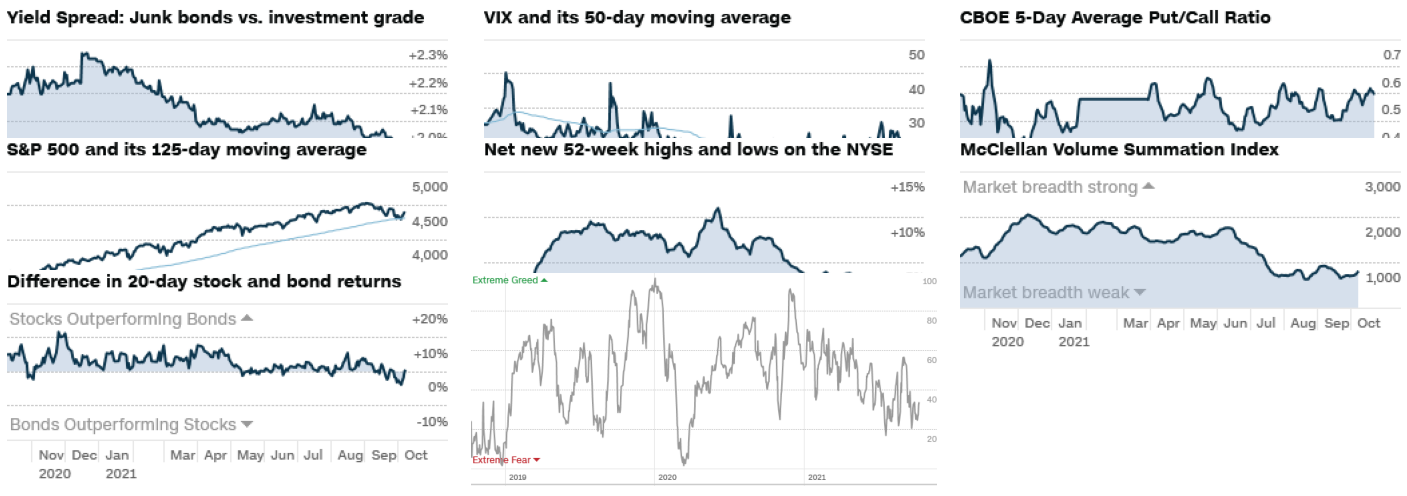

In [11]:
# cnn_fg = CNNFearAndGreedIndex()

# plot Fear and Greed charts
# fig = plt.figure(figsize=(20, 7))
# plt.show()

### predictStock
Accepts ticker symbol and returns prediction, using lstm algorithm.

In [ ]:
def predictStock(symbol):
#https://www.alphavantage.co/academy/
    
    try:
        os.remove('trainingComparison.png')
        os.remove('zoomedInTrainingComparison.png')
        os.remove('symbolPredict.png')        
    except:
        pass

    # API Key & Stock
    config = {
    "alpha_vantage": {
        "key": SYMBOL_KEY, # Claim your free API key here: https://www.alphavantage.co/support/#api-key
        "symbol": symbol,
        "outputsize": "full",
        "key_adjusted_close": "5. adjusted close",
        },
    "data": {
        "window_size": 20,
        "train_split_size": 0.80,
        }, 
    "plots": {
        "xticks_interval": 90, # show a date every 90 days
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
        },
    "model": {
        "input_size": 1, # since we are only using 1 feature, close price
        "num_lstm_layers": 2,
        "lstm_size": 32,
        "dropout": 0.2,
        },
    "training": {
        "device": "cpu", # "cuda" or "cpu"
        "batch_size": 64,
        "num_epoch": 100,
        "learning_rate": 0.01,
        "scheduler_step_size": 40,
        }
    }


    def download_data(config):
        #     Data Preparation: Acquiring Financial Markey Data, Graph for Stock
        ts = TimeSeries(key=config["alpha_vantage"]["key"])
        data, meta_data = ts.get_daily_adjusted(config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])

        data_date = [date for date in data.keys()]
        data_date.reverse()

        data_close_price = [float(data[date][config["alpha_vantage"]["key_adjusted_close"]]) for date in data.keys()]
        data_close_price.reverse()
        data_close_price = np.array(data_close_price)

        num_data_points = len(data_date)
        display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points-1]
        #     print("Number data points", num_data_points, display_date_range)

        return data_date, data_close_price, num_data_points, display_date_range

    data_date, data_close_price, num_data_points, display_date_range = download_data(config)

    class Normalizer():
        def __init__(self):
            self.mu = None
            self.sd = None

        def fit_transform(self, x):
            self.mu = np.mean(x, axis=(0), keepdims=True)
            self.sd = np.std(x, axis=(0), keepdims=True)
            normalized_x = (x - self.mu)/self.sd
            return normalized_x

        def inverse_transform(self, x):
            return (x*self.sd) + self.mu

    # normalize
    scaler = Normalizer()
    normalized_data_close_price = scaler.fit_transform(data_close_price)

    #Data Preparation: Generating Training and Validation Datasets
    def prepare_data_x(x, window_size):
        # perform windowing
        n_row = x.shape[0] - window_size + 1
        output = np.lib.stride_tricks.as_strided(x, shape=(n_row, window_size), strides=(x.strides[0], x.strides[0]))
        return output[:-1], output[-1]


    def prepare_data_y(x, window_size):
        # # perform simple moving average
        # output = np.convolve(x, np.ones(window_size), 'valid') / window_size

        # use the next day as label
        output = x[window_size:]
        return output

    data_x, data_x_unseen = prepare_data_x(normalized_data_close_price, window_size=config["data"]["window_size"])
    data_y = prepare_data_y(normalized_data_close_price, window_size=config["data"]["window_size"])

    # split dataset
    split_index = int(data_y.shape[0]*config["data"]["train_split_size"])
    data_x_train = data_x[:split_index]
    data_x_val = data_x[split_index:]
    data_y_train = data_y[:split_index]
    data_y_val = data_y[split_index:]

    #     DataLoader class
    class TimeSeriesDataset(Dataset):
        def __init__(self, x, y):
            x = np.expand_dims(x, 2) # in our case, we have only 1 feature, so we need to convert `x` into [batch, sequence, features] for LSTM
            self.x = x.astype(np.float32)
            self.y = y.astype(np.float32)

        def __len__(self):
            return len(self.x)

        def __getitem__(self, idx):
            return (self.x[idx], self.y[idx])

    dataset_train = TimeSeriesDataset(data_x_train, data_y_train)
    dataset_val = TimeSeriesDataset(data_x_val, data_y_val)

    #     print("Train data shape", dataset_train.x.shape, dataset_train.y.shape)
    #     print("Validation data shape", dataset_val.x.shape, dataset_val.y.shape)

    train_dataloader = DataLoader(dataset_train, batch_size=config["training"]["batch_size"], shuffle=True)
    val_dataloader = DataLoader(dataset_val, batch_size=config["training"]["batch_size"], shuffle=True)

    #     Defining the LSTM model (Long-Short-Term-Model)
    class LSTMModel(nn.Module):
        def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
            super().__init__()
            self.hidden_layer_size = hidden_layer_size

            self.linear_1 = nn.Linear(input_size, hidden_layer_size)
            self.relu = nn.ReLU()
            self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
            self.dropout = nn.Dropout(dropout)
            self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)

            self.init_weights()

        def init_weights(self):
            for name, param in self.lstm.named_parameters():
                if 'bias' in name:
                     nn.init.constant_(param, 0.0)
                elif 'weight_ih' in name:
                     nn.init.kaiming_normal_(param)
                elif 'weight_hh' in name:
                     nn.init.orthogonal_(param)

        def forward(self, x):
            batchsize = x.shape[0]

            # layer 1
            x = self.linear_1(x)
            x = self.relu(x)

            # LSTM layer
            lstm_out, (h_n, c_n) = self.lstm(x)

            # reshape output from hidden cell into [batch, features] for `linear_2`
            x = h_n.permute(1, 0, 2).reshape(batchsize, -1) 

            # layer 2
            x = self.dropout(x)
            predictions = self.linear_2(x)
            return predictions[:,-1]

    #Model Training
    def run_epoch(dataloader, is_training=False):
        epoch_loss = 0

        if is_training:
            model.train()
        else:
            model.eval()

        for idx, (x, y) in enumerate(dataloader):
            if is_training:
                optimizer.zero_grad()

            batchsize = x.shape[0]

            x = x.to(config["training"]["device"])
            y = y.to(config["training"]["device"])

            out = model(x)
            loss = criterion(out.contiguous(), y.contiguous())

            if is_training:
                loss.backward()
                optimizer.step()

            epoch_loss += (loss.detach().item() / batchsize)

        lr = scheduler.get_last_lr()[0]

        return epoch_loss, lr

    train_dataloader = DataLoader(dataset_train, batch_size=config["training"]["batch_size"], shuffle=True)
    val_dataloader = DataLoader(dataset_val, batch_size=config["training"]["batch_size"], shuffle=True)

    model = LSTMModel(input_size=config["model"]["input_size"], hidden_layer_size=config["model"]["lstm_size"], num_layers=config["model"]["num_lstm_layers"], output_size=1, dropout=config["model"]["dropout"])
    model = model.to(config["training"]["device"])

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=config["training"]["learning_rate"], betas=(0.9, 0.98), eps=1e-9)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=config["training"]["scheduler_step_size"], gamma=0.1)

    for epoch in range(config["training"]["num_epoch"]):
        loss_train, lr_train = run_epoch(train_dataloader, is_training=True)
        loss_val, lr_val = run_epoch(val_dataloader)
        scheduler.step()

    #         print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'.format(epoch+1, config["training"]["num_epoch"], loss_train, loss_val, lr_train))


    #     Model Evaluation
    # here we re-initialize dataloader so the data doesn't shuffled, so we can plot the values by date

    train_dataloader = DataLoader(dataset_train, batch_size=config["training"]["batch_size"], shuffle=False)
    val_dataloader = DataLoader(dataset_val, batch_size=config["training"]["batch_size"], shuffle=False)

    model.eval()

    # predict on the training data, to see how well the model managed to learn and memorize

    predicted_train = np.array([])

    for idx, (x, y) in enumerate(train_dataloader):
        x = x.to(config["training"]["device"])
        out = model(x)
        out = out.cpu().detach().numpy()
        predicted_train = np.concatenate((predicted_train, out))

    # predict on the validation data, to see how the model does

    predicted_val = np.array([])

    for idx, (x, y) in enumerate(val_dataloader):
        x = x.to(config["training"]["device"])
        out = model(x)
        out = out.cpu().detach().numpy()
        predicted_val = np.concatenate((predicted_val, out))

    # prepare data for plotting
    to_plot_data_y_train_pred = np.zeros(num_data_points)
    to_plot_data_y_val_pred = np.zeros(num_data_points)

    to_plot_data_y_train_pred[config["data"]["window_size"]:split_index+config["data"]["window_size"]] = scaler.inverse_transform(predicted_train)
    to_plot_data_y_val_pred[split_index+config["data"]["window_size"]:] = scaler.inverse_transform(predicted_val)

    to_plot_data_y_train_pred = np.where(to_plot_data_y_train_pred == 0, None, to_plot_data_y_train_pred)
    to_plot_data_y_val_pred = np.where(to_plot_data_y_val_pred == 0, None, to_plot_data_y_val_pred)

    # plots

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(data_date, data_close_price, label="Actual prices", color=config["plots"]["color_actual"])
    plt.plot(data_date, to_plot_data_y_train_pred, label="Predicted prices (train)", color=config["plots"]["color_pred_train"])
    plt.plot(data_date, to_plot_data_y_val_pred, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])
    plt.title("Compare predicted prices to actual prices")
    xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
    x = np.arange(0,len(xticks))
    plt.xticks(x, xticks, rotation='vertical')
    plt.grid(b=None, which='major', axis='y', linestyle='--')
    plt.legend()
    plt.savefig('trainingComparison.png')


    #Zoomed in Graph
    # prepare data for plotting the zoomed in view of the predicted prices (on validation set) vs. actual prices

    to_plot_data_y_val_subset = scaler.inverse_transform(data_y_val)
    to_plot_predicted_val = scaler.inverse_transform(predicted_val)
    to_plot_data_date = data_date[split_index+config["data"]["window_size"]:]

    # plots

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(to_plot_data_date, to_plot_data_y_val_subset, label="Actual prices", color=config["plots"]["color_actual"])
    plt.plot(to_plot_data_date, to_plot_predicted_val, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])
    plt.title("Zoom in to examine predicted price on validation data portion")
    xticks = [to_plot_data_date[i] if ((i%int(config["plots"]["xticks_interval"]/5)==0 and (len(to_plot_data_date)-i) > config["plots"]["xticks_interval"]/6) or i==len(to_plot_data_date)-1) else None for i in range(len(to_plot_data_date))] # make x ticks nice
    xs = np.arange(0,len(xticks))
    plt.xticks(xs, xticks, rotation='vertical')
    plt.grid(b=None, which='major', axis='y', linestyle='--')
    plt.legend()
    plt.savefig('zoomedInTrainingComparison.png')

    # Predicting Future Stock Prices https://www.alphavantage.co/documentation/#technical-indicators


    # predict the closing price of the next trading day

    model.eval()

    x = torch.tensor(data_x_unseen).float().to(config["training"]["device"]).unsqueeze(0).unsqueeze(2) # this is the data type and shape required, [batch, sequence, feature]
    prediction = model(x)
    prediction = prediction.cpu().detach().numpy()

    # prepare plots

    plot_range = 10
    to_plot_data_y_val = np.zeros(plot_range)
    to_plot_data_y_val_pred = np.zeros(plot_range)
    to_plot_data_y_test_pred = np.zeros(plot_range)

    to_plot_data_y_val[:plot_range-1] = scaler.inverse_transform(data_y_val)[-plot_range+1:]
    to_plot_data_y_val_pred[:plot_range-1] = scaler.inverse_transform(predicted_val)[-plot_range+1:]

    to_plot_data_y_test_pred[plot_range-1] = scaler.inverse_transform(prediction)

    to_plot_data_y_val = np.where(to_plot_data_y_val == 0, None, to_plot_data_y_val)
    to_plot_data_y_val_pred = np.where(to_plot_data_y_val_pred == 0, None, to_plot_data_y_val_pred)
    to_plot_data_y_test_pred = np.where(to_plot_data_y_test_pred == 0, None, to_plot_data_y_test_pred)

    # plot

    plot_date_test = data_date[-plot_range+1:]
    plot_date_test.append("tomorrow")

    fig = figure(figsize=(25, 5), dpi=80)
    fig.patch.set_facecolor((1.0, 1.0, 1.0))
    plt.plot(plot_date_test, to_plot_data_y_val, label="Actual prices", marker=".", markersize=10, color=config["plots"]["color_actual"])
    plt.plot(plot_date_test, to_plot_data_y_val_pred, label="Past predicted prices", marker=".", markersize=10, color=config["plots"]["color_pred_val"])
    plt.plot(plot_date_test, to_plot_data_y_test_pred, label="Predicted price for next day", marker=".", markersize=20, color=config["plots"]["color_pred_test"])
    plt.title("Predicted close price of the next trading day: {}".format(round(to_plot_data_y_test_pred[plot_range-1], 2)))
    plt.grid(b=None, which='major', axis='y', linestyle='--')
    plt.legend()
    plt.savefig('symbolPredict.png')

In [ ]:
# When message '#predict' returns report with images
@client.command(pass_context = True)
async def predict(ctx, symbol):
    await ctx.channel.send("Your Prediction Will Be Availabe in `~= 3 mins`.")
    predictStock(symbol)
#     time.sleep(180)
    await ctx.channel.send(file=discord.File('trainingComparison.png'))
    await ctx.channel.send(file=discord.File('zoomedInTrainingComparison.png'))
    await ctx.channel.send(file=discord.File('symbolPredict.png'))

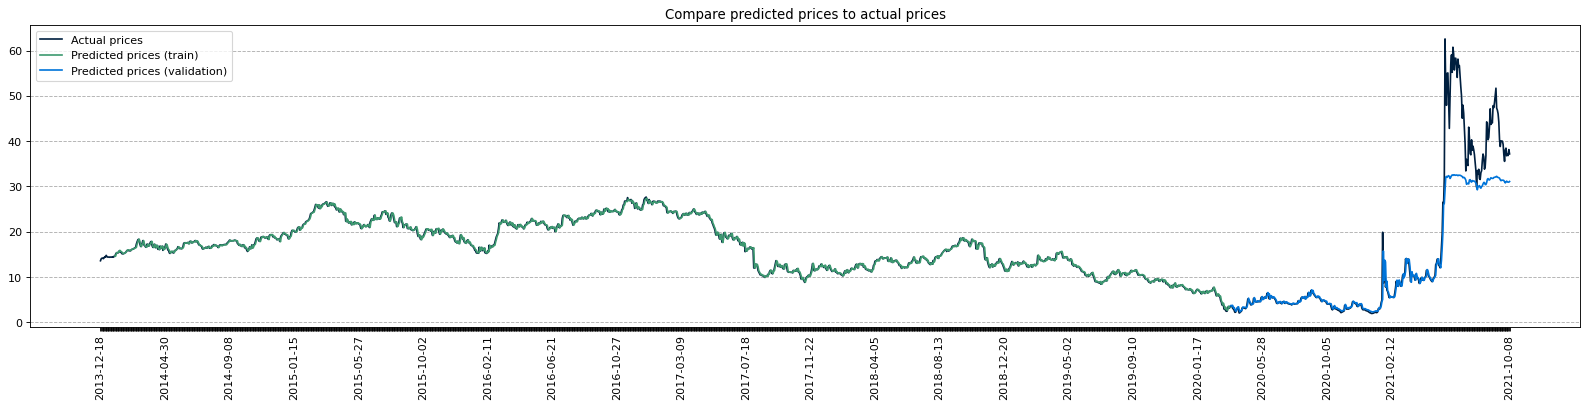

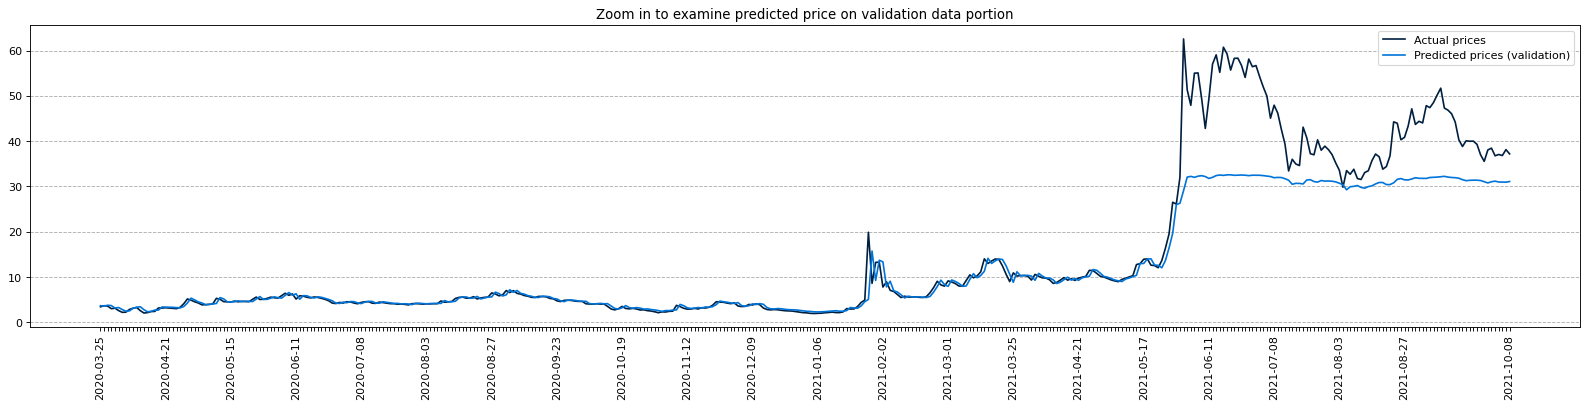

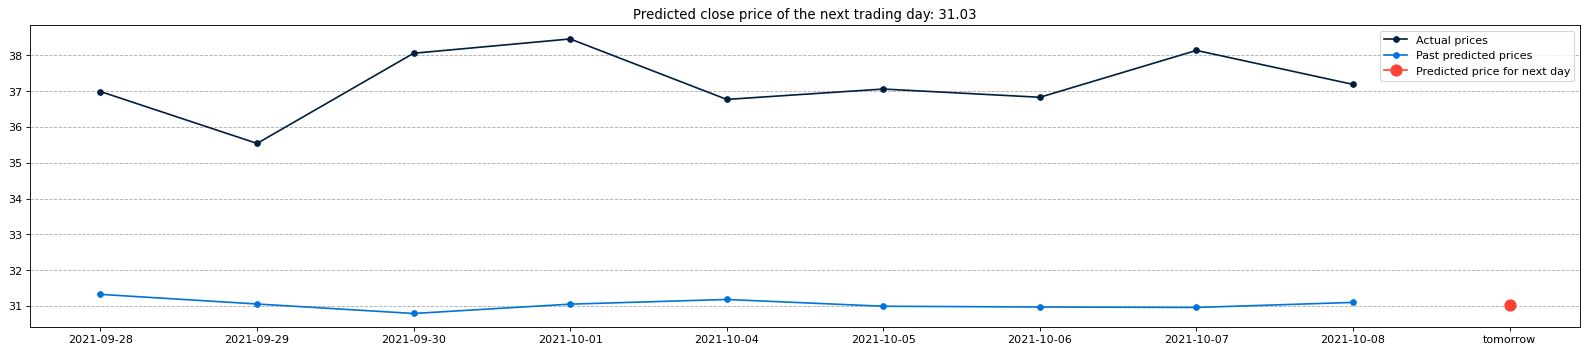

## Other

In [12]:
# Other funcs go here.

In [ ]:
# run the bot -- must be the last thing to run, as this is a blocking call
client.run(api_key)